In [17]:
import fastfusion
from fastfusion.mapper import Metrics

spec = fastfusion.Specification.from_yaml(
    "architectures/fastfusion/tpu_like.yaml",
    "workloads/fastfusion/gemm_16k.yaml",
)
spec.mapper.ffm.metrics = Metrics.ENERGY | Metrics.LATENCY
pmappings = fastfusion.mapper.FFM.make_pmappings(spec)
mappings = fastfusion.mapper.FFM.join_pmappings(spec, pmappings)

WARNING Loading configuration file from /home/gilbertm/work/venv/fastfusion/config.yaml

Generating pmapping templates for compute scalar_unit Einsum Matmul: 0it [00:00, ?it/s]           | 0/2 [00:00<?, ?it/s]

Generating pmapping templates for compute MAC Einsum Matmul: 8it [00:00, 88.14it/s]       | 1/2 [00:00<00:00,  1.07it/s]
Generating jobs: 100%|████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  2.00it/s]
WARNING Einsum Matmul has 8 pmapping templates:
WARNING 	[WA,I,A in MainMemory] T-m,na initial=symbol stride=symbol [A in GlobalBuffer] T-ni initial=symbol stride=symbol [I in GlobalBuffer] T-na initial=symbol stride=symbol S-Z-m initial=symbol stride=symbol S-Y-ni initial=symbol stride=symbol S-X-na initial=symbol stride=symbol [WA in Register] T-m initial=symbol stride=symbol MAC computes Matmul
WARNING 	[WA,I,A in MainMemory] T-m,ni initial=symbol stride=symbol [I in GlobalBuffer] T-na initial=symbol stride=symbol [A in GlobalBuffer] T-ni

Einsum Matmul has 12 pmappings with 8 compatibilities



Compressing pmappings: 100%|█████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 175.31it/s]


Not tracking GlobalBuffer because it is never reserved for multiple pmappings.
Not tracking LocalBuffer because it is never reserved for multiple pmappings.
Not tracking MainMemory because it is never reserved for multiple pmappings.
Not tracking Register because it is never reserved for multiple pmappings.



Removing unneeded reservations for Matmul: 100%|████████████████████████████████████████| 16/16 [00:01<00:00, 11.44it/s]

Final consolidate: 100%|████████████████████████████████████████████████████████████████| 16/16 [00:00<00:00, 23.60it/s]

Grouping pmappings: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 454.17it/s]


In [21]:
chosen_mapping = mappings.data.iloc[-1]['Matmul<SEP>mapping']

In [ ]:
from fastfusion.model.looptree.run import run_looptree_symbolic

run_looptree_symbolic

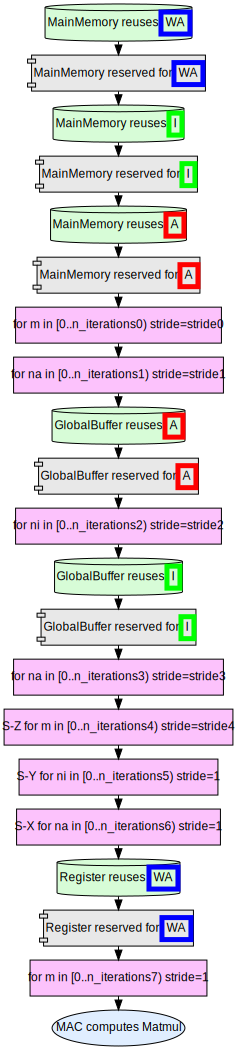

In [22]:
from IPython.display import SVG, display

display(SVG(chosen_mapping.render()))